In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/atm-data/culster_data2_clean.csv
/kaggle/input/atm-data/culster_data0_clean.csv
/kaggle/input/atm-data/merged_df.csv
/kaggle/input/atm-data/culster_data3_clean.csv
/kaggle/input/atm-data/cluster2_data.csv
/kaggle/input/atm-data/culster_data1_b.csv
/kaggle/input/atm-data/cluster1_data.csv
/kaggle/input/atm-data/culster_data2_b.csv
/kaggle/input/atm-data/culster_data0_b.csv
/kaggle/input/atm-data/df_only_representative_atms.csv
/kaggle/input/atm-data/final_data_cleaned_ready.csv
/kaggle/input/atm-data/atm_data.csv
/kaggle/input/atm-data/best_model_params.json
/kaggle/input/atm-data/df_features.csv
/kaggle/input/atm-data/cluster3_data.csv
/kaggle/input/atm-data/cluster0_data.csv
/kaggle/input/atm-data/df_more_features.csv
/kaggle/input/atm-data/culster_data1_clean.csv


In [2]:
df=pd.read_csv('/kaggle/input/atm-data/culster_data0_b.csv')

In [3]:
df_1=df[df['atm_id']==1]
df_1

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,date,atm_id,amount,GROUP_LABEL,amount_next_day,is_weekend,month,is_end_of_month,is_start_of_month,week_of_year,...,atm_mean_deposit_all_time,cv_7,rolling_max_gap,rolling_min_gap,days_since_last_spike,atm_city_ratio,atm_rank_in_city,avg_by_dow,lag_corr_7,cluster_base_on_features
0,2022-07-01,1,151500.0,16,43400.0,0,7,0,1,26,...,68720.3802,0.552749,889.0,5.0,341.0,0.002289,189.0,85825.903225,0.283852,0
1062,2022-07-02,1,43400.0,16,32500.0,1,7,0,1,26,...,68720.3802,1.150528,890.0,6.0,342.0,0.002289,189.0,59552.187798,0.283852,0
1595,2022-07-03,1,32500.0,16,110200.0,1,7,0,1,26,...,68720.3802,0.928324,891.0,0.0,343.0,1.000000,167.0,42297.319404,0.283852,0
2169,2022-07-04,1,110200.0,16,88000.0,0,7,0,0,27,...,68720.3802,1.024603,892.0,1.0,344.0,0.002289,188.0,73030.509352,0.283852,0
2502,2022-07-05,1,88000.0,16,90200.0,0,7,0,0,27,...,68720.3802,0.809906,893.0,2.0,345.0,1.000000,203.0,73988.793782,0.283852,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490941,2025-01-16,1,38100.0,16,36800.0,0,1,0,0,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
491772,2025-01-17,1,36800.0,16,23700.0,0,1,0,0,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
491841,2025-01-18,1,23700.0,16,13400.0,1,1,0,0,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
492463,2025-01-19,1,13400.0,16,38800.0,1,1,0,0,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [4]:
df_1=df_1.drop(columns=['atm_id','cluster_base_on_features','amount_original','amount_next_day'])

In [5]:
df_1['date']=pd.to_datetime(df['date'])

In [6]:
df_1=df_1.set_index('date')

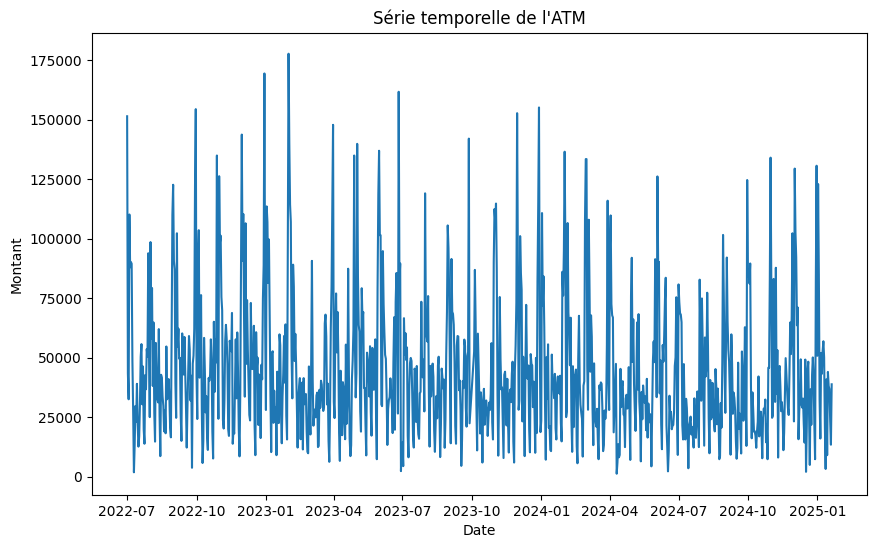

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(df_1.index, df_1['amount'])
plt.title('Série temporelle de l\'ATM')
plt.xlabel('Date')
plt.ylabel('Montant')
plt.show()

In [8]:
print(df_1['amount'].describe())

count       924.000000
mean      44597.727273
std       29680.036686
min        1200.000000
25%       24100.000000
50%       38000.000000
75%       56825.000000
max      177800.000000
Name: amount, dtype: float64


In [9]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_1['amount'])

print('Statistique ADF:', result[0])
print('p-value:', result[1])
if result[1] < 0.05:
    print("La série est stationnaire.")
else:
    print("La série n'est pas stationnaire.")

Statistique ADF: -8.917714533607663
p-value: 1.0615537533954561e-14
La série est stationnaire.


In [10]:
df_1=df_1.dropna()

In [11]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
X = df_1[['lag_1','lag_7']]
X = sm.add_constant(X)  
y = df_1['amount']

model = sm.OLS(y, X).fit()

bp_test = het_breuschpagan(model.resid, model.model.exog)


print('Statistique de Breusch-Pagan:', bp_test[0])
print('p-value:', bp_test[1])

if bp_test[1] < 0.05:
    print("Présence d'hétéroscédasticité (variance non constante).")
else:
    print("Pas d'hétéroscédasticité (variance constante).")


Statistique de Breusch-Pagan: 21.284883755180633
p-value: 2.3880654126326244e-05
Présence d'hétéroscédasticité (variance non constante).


In [12]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
df_1['log_amount'] = np.log(df_1['amount'] + 1)
X = df_1[['lag_1','lag_7']]
X = sm.add_constant(X)
y = df_1['log_amount']

model = sm.OLS(y, X).fit()

bp_stat, bp_pvalue, _, _ = het_breuschpagan(model.resid, model.model.exog)


if bp_pvalue < 0.05:
    print("Hétéroscédasticité toujours présente après transformation log.")
else:
    print("Variance stabilisée après transformation log.")


Variance stabilisée après transformation log.


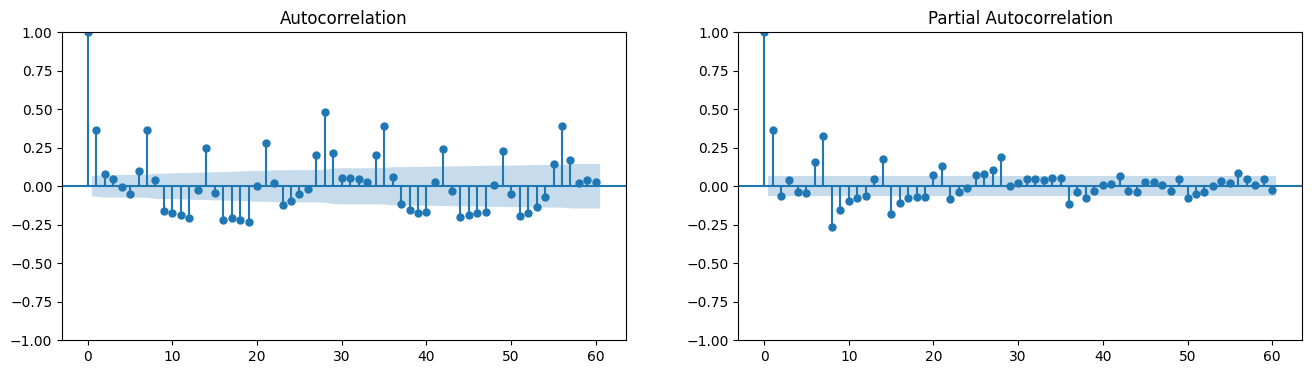

In [13]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

series = df_1['log_amount']

fig, axes = plt.subplots(1, 2, figsize=(16, 4))
plot_acf(series, lags=60, ax=axes[0])
plot_pacf(series, lags=60, ax=axes[1])
plt.show()

In [14]:
from statsmodels.tsa.arima.model import ARIMA

y_train = df_1['log_amount'][:'2024-11-30']
X_train = df_1.loc[:'2024-11-30'].drop(columns=['log_amount','amount'])
y_test = df_1['log_amount']['2024-12-01':'2024-12-31']
X_test = df_1.loc['2024-12-01':'2024-12-31'].drop(columns=['log_amount','amount'])


In [15]:
for column in X_train.columns:
    is_constant = (X_train[column] == X_train[column].iloc[0]).all()
    if is_constant:
        print(f"Column '{column}' has constant values: {X_train[column].iloc[0]}")

Column 'GROUP_LABEL' has constant values: 16
Column 'zone_type' has constant values: 1
Column 'atm_location_type' has constant values: 0
Column 'weekend_weekday_ratio' has constant values: 0.3982763383076563
Column 'nb_jours_faibles30' has constant values: 0.0
Column 'city' has constant values: 76.0
Column 'region' has constant values: 1.0
Column 'atm_mean_deposit_all_time' has constant values: 68720.38020006868
Column 'lag_corr_7' has constant values: 0.2838524947547337


In [16]:
X_train=X_train.drop(columns=['GROUP_LABEL' NBBBBBBBBNBB,'zone_type','atm_location_type','weekend_weekday_ratio','nb_jours_faibles30','city','region','atm_mean_deposit_all_time','lag_corr_7'])
X_test=X_test.drop(columns=['GROUP_LABEL','zone_type','atm_location_type','weekend_weekday_ratio','nb_jours_faibles30','city','region','atm_mean_deposit_all_time','lag_corr_7'])

In [17]:
model = ARIMA(y_train, order=(1, 0, 1), exog=X_train)
result = model.fit()

print(result.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:             log_amount   No. Observations:                  866
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 569.782
Date:                Wed, 21 May 2025   AIC                           -903.565
Time:                        10:00:56   BIC                           -341.427
Sample:                             0   HQIC                          -688.428
                                - 866                                         
Covariance Type:                  opg                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       6.7425   5.73e-07   1.18e+07      0.000       6.742       6.742
is_weekend                  0.1331   1.07e-06   1.25e+05      0.000       0.133       0.133


In [18]:
forecast = result.forecast(steps=len(y_test), exog=X_test)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [19]:
print(f"y_test shape: {y_test.shape}")

y_test shape: (31,)



Performance Metrics on Original Scale:
RMSE: 0.356226
MAE: 0.182900


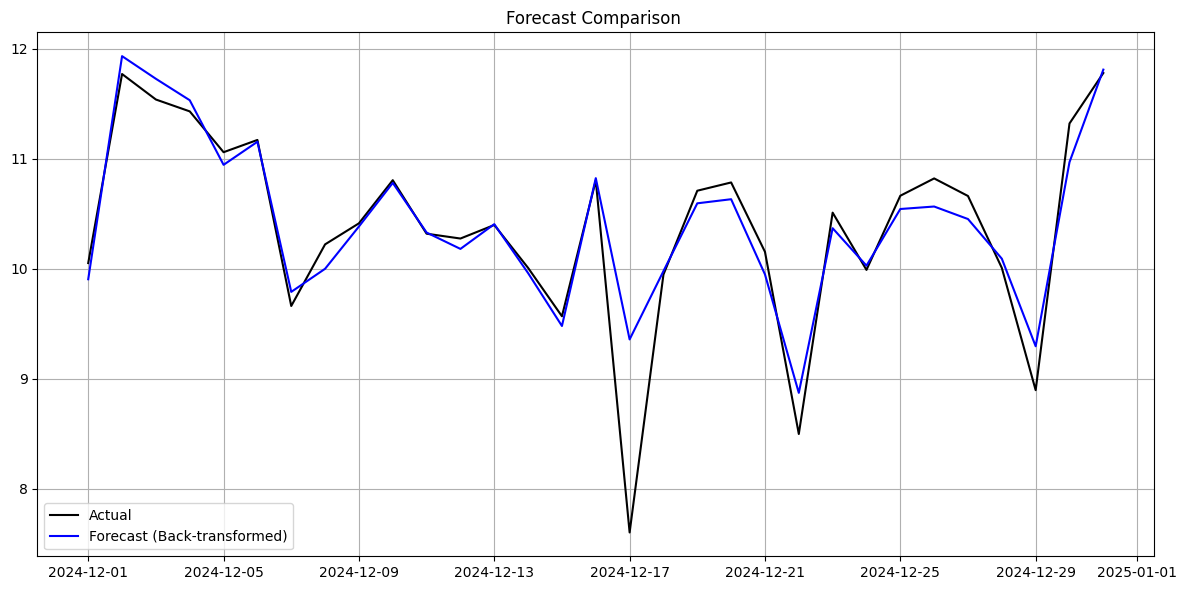

In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# Calculate metrics
mse = mean_squared_error(y_test, forecast)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, forecast)

print("\nPerformance Metrics on Original Scale:")
print(f"RMSE: {rmse:.6f}")
print(f"MAE: {mae:.6f}")

# Visualization
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual', color='black')  # use y_test_real here for original scale
plt.plot(y_test.index, forecast, label='Forecast (Back-transformed)', color='blue')
plt.title('Forecast Comparison ')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(



Performance Metrics on Original Scale:
RMSE: 8509.499728
MAE: 5627.688183


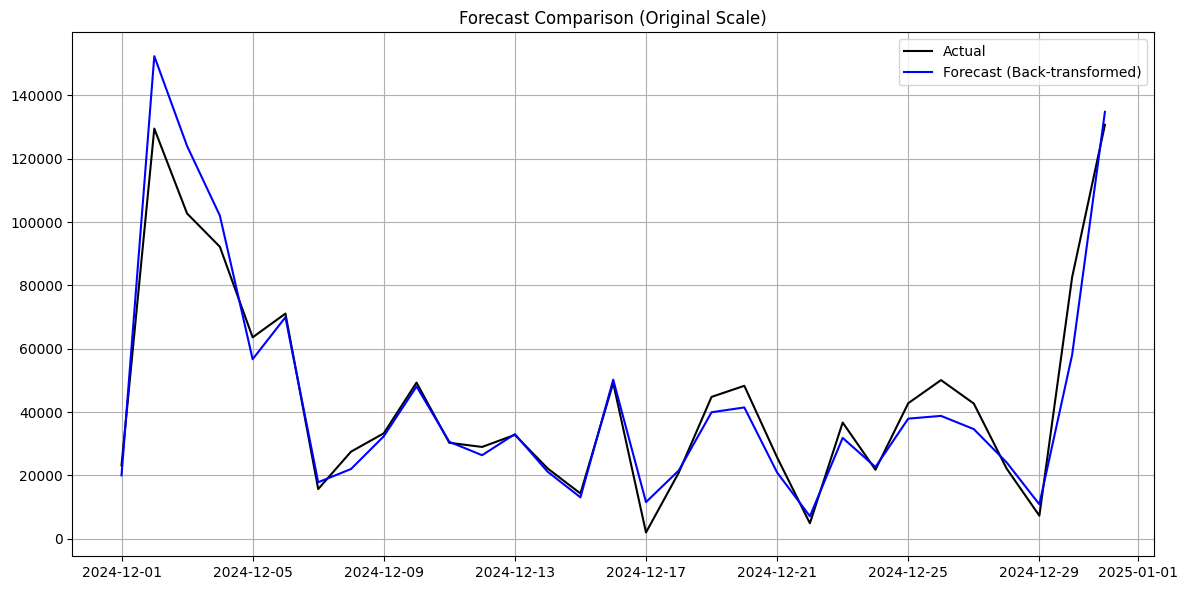

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
# Assuming you have your forecast in log scale
forecast = result.forecast(steps=len(y_test), exog=X_test)

# Convert predictions back to original scale
forecast_original_scale = np.exp(forecast) - 1

# Now calculate metrics on the original scale
# You may need to transform y_test back as well if it's currently in log scale
y_test_original = np.exp(y_test) - 1

# Calculate metrics
mse = mean_squared_error(y_test_original, forecast_original_scale)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_original, forecast_original_scale)

print("\nPerformance Metrics on Original Scale:")
print(f"RMSE: {rmse:.6f}")
print(f"MAE: {mae:.6f}")

# Visualization
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test_original, label='Actual', color='black')
plt.plot(y_test.index, forecast_original_scale, label='Forecast (Back-transformed)', color='blue')
plt.title('Forecast Comparison (Original Scale)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [22]:
df=df.drop(columns=['GROUP_LABEL','zone_type','atm_location_type','weekend_weekday_ratio','nb_jours_faibles30','city','region','atm_mean_deposit_all_time','lag_corr_7','cluster_base_on_features','amount_original','amount_next_day'])

In [23]:
df['log_amount'] = np.log(df['amount'] + 1)

In [24]:
df['date']=pd.to_datetime(df['date'])

In [25]:
df=df.set_index('date')

In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# Get all ATM IDs except the representative one
atm_ids = df['atm_id'].unique()
other_atms = [atm for atm in atm_ids]
rmse_list = []
mae_list = []
skipped_atms = 0
error_atms = 0

for atm_id in other_atms:
    try:
        df_atm = df[df['atm_id'] == atm_id].copy()
        
        # Check if we have December 2024 data
        test_df = df_atm.loc['2024-12-01':'2024-12-31']
        if len(test_df) == 0:
            skipped_atms += 1
            continue
            
        y_test = test_df['log_amount']
        X_test = test_df.drop(columns=['log_amount','amount','atm_id'])
        
        # Drop rows with NaNs or Infs
        valid_mask = np.isfinite(X_test).all(axis=1) & np.isfinite(y_test)
        X_test = X_test[valid_mask]
        y_test = y_test[valid_mask]
        
        if len(y_test) == 0:
            skipped_atms += 1
            continue  # skip if all rows were invalid
        
        # Generate forecast
        forecast_log = result.forecast(steps=len(y_test), exog=X_test)
        
        # Convert back to original scale - IMPORTANT FIX
        forecast_original = np.exp(forecast_log) - 1  # Note: subtract 1, not add 1
        y_test_original = np.exp(y_test) - 1
        
        # Check for inf/nan values before calculating metrics
        if np.any(np.isinf(forecast_original)) or np.any(np.isnan(forecast_original)):
            print(f"Warning: ATM {atm_id} has inf/nan in forecast, skipping")
            skipped_atms += 1
            continue
            
        # Calculate metrics with protection against extreme values
        # Cap extremely large values to prevent inf
        max_reasonable_value = 1e10  # Adjust based on your domain knowledge
        forecast_capped = np.minimum(forecast_original, max_reasonable_value)
        y_test_capped = np.minimum(y_test_original, max_reasonable_value)
        
        rmse = np.sqrt(mean_squared_error(y_test_capped, forecast_capped))
        mae = mean_absolute_error(y_test_capped, forecast_capped)
        
        # Only append reasonable metric values
        if np.isfinite(rmse) and np.isfinite(mae):
            rmse_list.append(rmse)
            mae_list.append(mae)
            print(f"ATM {atm_id} - RMSE: {rmse:.2f}, MAE: {mae:.2f}")
        else:
            print(f"Warning: ATM {atm_id} has invalid metrics: RMSE={rmse}, MAE={mae}")
            skipped_atms += 1
            
    except Exception as e:
        print(f"Error for ATM {atm_id}: {e}")
        error_atms += 1
        continue

# Final average metrics with safety checks
if rmse_list and mae_list:
    print(f"\n✅ Average RMSE: {np.mean(rmse_list):.2f}")
    print(f"✅ Average MAE: {np.mean(mae_list):.2f}")
    print(f"✅ Median RMSE: {np.median(rmse_list):.2f}")
    print(f"✅ Median MAE: {np.median(mae_list):.2f}")
else:
    print("\n❌ No valid metrics were calculated!")

print(f"\nProcessed {len(other_atms)} ATMs")
print(f"Skipped {skipped_atms} ATMs due to data issues")
print(f"Encountered errors in {error_atms} ATMs")
print(f"Successfully evaluated {len(rmse_list)} ATMs")

ATM 1 - RMSE: 8509.50, MAE: 5627.69
ATM 1752 - RMSE: 1510782.65, MAE: 726292.87
ATM 1748 - RMSE: 58925.35, MAE: 16503.94
ATM 1743 - RMSE: 9513136351.74, MAE: 9139331650.33
ATM 1742 - RMSE: 8113238864.36, MAE: 6817271784.96
ATM 188 - RMSE: 2016305.42, MAE: 800919.64
ATM 182 - RMSE: 17775.87, MAE: 12628.37
ATM 1756 - RMSE: 90508.40, MAE: 87823.65
ATM 1774 - RMSE: 182899.52, MAE: 67820.56
ATM 177 - RMSE: 1713386.68, MAE: 583307.16
ATM 179 - RMSE: 4878704.57, MAE: 2581286.91
ATM 181 - RMSE: 1868886.55, MAE: 760590.76
ATM 189 - RMSE: 4218921.17, MAE: 2729406.68
ATM 1702 - RMSE: 348710.28, MAE: 102096.19
ATM 1697 - RMSE: 1424067.79, MAE: 1255515.27
ATM 1731 - RMSE: 12845248.30, MAE: 4503063.91
ATM 1706 - RMSE: 2842772724.43, MAE: 1011351164.57
ATM 1718 - RMSE: 548739.34, MAE: 270382.66
ATM 1715 - RMSE: 1207061.80, MAE: 314366.95
ATM 198 - RMSE: 1663162.49, MAE: 442070.30
ATM 1711 - RMSE: 644227.15, MAE: 176912.03
ATM 199 - RMSE: 661200.30, MAE: 211289.62
ATM 1704 - RMSE: 235969242.43, MAE: 9